# A comparison of LSTM and GRU performance
This notebook tests the performance of LSTM and GRU models on the sine wave.
<br>Special thanks to examples on MLM:
<br>https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [1]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [2]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)

In [3]:
# function: convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [4]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [5]:
data_1_sin = numpy.sin(range(1, 10001))
data_1_sin = data_1_sin.reshape(10000, 1)

In [6]:
data_2 = numpy.array(list(range(1, 10001,1)))
data_2 = data_2 + 20000
data_2_sin = numpy.sin(data_2)
data_2_sin = data_2_sin.reshape(10000, 1)

In [7]:
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(data_1_sin, look_back)
testX, testY = create_dataset(data_2_sin, look_back)

In [8]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [9]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[2]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[2]))

In [10]:
# create and fit the LSTM network
model_LSTM = Sequential()
model_LSTM.add(LSTM(4, input_shape=(1, look_back)))
model_LSTM.add(Dense(1))
model_LSTM.compile(loss='mean_squared_error', optimizer='adam')

In [11]:
# create and fit the GRU network
model_GRU = Sequential()
model_GRU.add(GRU(4, input_shape=(1, look_back), activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True,
                  kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', 
                  kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, 
                  activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, 
                  dropout=0.0, recurrent_dropout=0.0))
model_GRU.add(Dense(1))
model_GRU.compile(loss='mean_squared_error', optimizer='adam')

In [12]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='loss', patience=20)]

In [13]:
model_LSTM.fit(trainX, trainY, epochs=500, batch_size = 256, callbacks=callbacks, verbose=True)

Epoch 1/500
9989/9989 [==============================] - 2s 171us/step - loss: 0.3709
Epoch 2/500
9989/9989 [==============================] - 0s 23us/step - loss: 0.2759
Epoch 3/500
9989/9989 [==============================] - 0s 20us/step - loss: 0.1929
Epoch 4/500
9989/9989 [==============================] - 0s 20us/step - loss: 0.1238
Epoch 5/500
9989/9989 [==============================] - 0s 19us/step - loss: 0.0710
Epoch 6/500
9989/9989 [==============================] - 0s 20us/step - loss: 0.0355
Epoch 7/500
9989/9989 [==============================] - 0s 19us/step - loss: 0.0166
Epoch 8/500
9989/9989 [==============================] - 0s 22us/step - loss: 0.0085
Epoch 9/500
9989/9989 [==============================] - 0s 23us/step - loss: 0.0049
Epoch 10/500
9989/9989 [==============================] - 0s 20us/step - loss: 0.0035
Epoch 11/500
9989/9989 [==============================] - 0s 22us/step - loss: 0.0029
Epoch 12/500
9989/9989 [==============================] - 0s 2

9989/9989 [==============================] - 0s 14us/step - loss: 1.6537e-05
Epoch 93/500
9989/9989 [==============================] - 0s 13us/step - loss: 1.5936e-05
Epoch 94/500
9989/9989 [==============================] - 0s 13us/step - loss: 1.5306e-05
Epoch 95/500
9989/9989 [==============================] - 0s 13us/step - loss: 1.4824e-05
Epoch 96/500
9989/9989 [==============================] - 0s 13us/step - loss: 1.4353e-05
Epoch 97/500
9989/9989 [==============================] - 0s 14us/step - loss: 1.3803e-05
Epoch 98/500
9989/9989 [==============================] - 0s 13us/step - loss: 1.3389e-05
Epoch 99/500
9989/9989 [==============================] - 0s 11us/step - loss: 1.2937e-05
Epoch 100/500
9989/9989 [==============================] - 0s 12us/step - loss: 1.2367e-05
Epoch 101/500
9989/9989 [==============================] - 0s 13us/step - loss: 1.1928e-05
Epoch 102/500
9989/9989 [==============================] - 0s 13us/step - loss: 1.1558e-05
Epoch 103/500
9989/9

9989/9989 [==============================] - 0s 13us/step - loss: 1.1371e-06
Epoch 183/500
9989/9989 [==============================] - 0s 13us/step - loss: 1.0881e-06
Epoch 184/500
9989/9989 [==============================] - 0s 14us/step - loss: 1.0347e-06
Epoch 185/500
9989/9989 [==============================] - 0s 12us/step - loss: 1.0293e-06
Epoch 186/500
9989/9989 [==============================] - 0s 15us/step - loss: 1.0019e-06
Epoch 187/500
9989/9989 [==============================] - 0s 13us/step - loss: 9.9937e-07
Epoch 188/500
9989/9989 [==============================] - 0s 13us/step - loss: 9.6772e-07
Epoch 189/500
9989/9989 [==============================] - 0s 13us/step - loss: 9.2792e-07
Epoch 190/500
9989/9989 [==============================] - 0s 13us/step - loss: 9.0897e-07
Epoch 191/500
9989/9989 [==============================] - 0s 13us/step - loss: 9.2965e-07
Epoch 192/500
9989/9989 [==============================] - 0s 14us/step - loss: 8.9674e-07
Epoch 193/500

9989/9989 [==============================] - 0s 13us/step - loss: 2.3159e-07
Epoch 273/500
9989/9989 [==============================] - 0s 14us/step - loss: 3.0005e-07
Epoch 274/500
9989/9989 [==============================] - 0s 14us/step - loss: 2.6551e-07
Epoch 275/500
9989/9989 [==============================] - 0s 13us/step - loss: 2.9231e-07
Epoch 276/500
9989/9989 [==============================] - 0s 14us/step - loss: 2.9086e-07
Epoch 277/500
9989/9989 [==============================] - 0s 13us/step - loss: 2.8912e-07
Epoch 278/500
9989/9989 [==============================] - 0s 13us/step - loss: 3.1691e-07
Epoch 279/500
9989/9989 [==============================] - 0s 13us/step - loss: 4.9928e-07
Epoch 280/500
9989/9989 [==============================] - 0s 12us/step - loss: 2.5271e-07
Epoch 281/500
9989/9989 [==============================] - 0s 14us/step - loss: 2.3196e-07
Epoch 282/500
9989/9989 [==============================] - 0s 14us/step - loss: 2.2224e-07
Epoch 283/500

9989/9989 [==============================] - 0s 12us/step - loss: 1.3477e-07
Epoch 363/500
9989/9989 [==============================] - 0s 14us/step - loss: 1.8594e-07
Epoch 364/500
9989/9989 [==============================] - 0s 13us/step - loss: 1.2418e-07
Epoch 365/500
9989/9989 [==============================] - 0s 14us/step - loss: 1.2170e-07
Epoch 366/500
9989/9989 [==============================] - 0s 13us/step - loss: 1.7253e-07
Epoch 367/500
9989/9989 [==============================] - 0s 13us/step - loss: 1.4859e-07
Epoch 368/500
9989/9989 [==============================] - 0s 13us/step - loss: 1.2256e-07
Epoch 369/500
9989/9989 [==============================] - 0s 13us/step - loss: 1.4772e-07
Epoch 370/500
9989/9989 [==============================] - 0s 13us/step - loss: 1.1842e-07
Epoch 371/500
9989/9989 [==============================] - 0s 12us/step - loss: 1.6662e-07


In [14]:
model_GRU.fit(trainX, trainY, epochs=500, batch_size = 256, callbacks=callbacks, verbose=True)

Epoch 1/500
9989/9989 [==============================] - 1s 142us/step - loss: 0.4559
Epoch 2/500
9989/9989 [==============================] - 0s 20us/step - loss: 0.2522
Epoch 3/500
9989/9989 [==============================] - 0s 20us/step - loss: 0.1274
Epoch 4/500
9989/9989 [==============================] - 0s 18us/step - loss: 0.0544
Epoch 5/500
9989/9989 [==============================] - 0s 17us/step - loss: 0.0181
Epoch 6/500
9989/9989 [==============================] - 0s 17us/step - loss: 0.0045
Epoch 7/500
9989/9989 [==============================] - 0s 20us/step - loss: 8.9898e-04
Epoch 8/500
9989/9989 [==============================] - 0s 20us/step - loss: 1.9488e-04
Epoch 9/500
9989/9989 [==============================] - 0s 18us/step - loss: 9.5170e-05
Epoch 10/500
9989/9989 [==============================] - 0s 19us/step - loss: 8.2076e-05
Epoch 11/500
9989/9989 [==============================] - 0s 17us/step - loss: 7.8253e-05
Epoch 12/500
9989/9989 [==================

9989/9989 [==============================] - 0s 13us/step - loss: 1.3634e-05
Epoch 93/500
9989/9989 [==============================] - 0s 14us/step - loss: 1.3696e-05
Epoch 94/500
9989/9989 [==============================] - 0s 14us/step - loss: 1.3411e-05
Epoch 95/500
9989/9989 [==============================] - 0s 14us/step - loss: 1.3255e-05
Epoch 96/500
9989/9989 [==============================] - 0s 16us/step - loss: 1.3143e-05
Epoch 97/500
9989/9989 [==============================] - 0s 14us/step - loss: 1.3038e-05
Epoch 98/500
9989/9989 [==============================] - 0s 14us/step - loss: 1.2838e-05
Epoch 99/500
9989/9989 [==============================] - 0s 13us/step - loss: 1.2657e-05
Epoch 100/500
9989/9989 [==============================] - 0s 13us/step - loss: 1.2515e-05
Epoch 101/500
9989/9989 [==============================] - 0s 14us/step - loss: 1.2390e-05
Epoch 102/500
9989/9989 [==============================] - 0s 16us/step - loss: 1.2486e-05
Epoch 103/500
9989/9

9989/9989 [==============================] - 0s 14us/step - loss: 1.8114e-06
Epoch 183/500
9989/9989 [==============================] - 0s 14us/step - loss: 1.6822e-06
Epoch 184/500
9989/9989 [==============================] - 0s 14us/step - loss: 1.8733e-06
Epoch 185/500
9989/9989 [==============================] - 0s 14us/step - loss: 1.8689e-06
Epoch 186/500
9989/9989 [==============================] - 0s 14us/step - loss: 1.5267e-06
Epoch 187/500
9989/9989 [==============================] - 0s 15us/step - loss: 1.4869e-06
Epoch 188/500
9989/9989 [==============================] - 0s 14us/step - loss: 1.4250e-06
Epoch 189/500
9989/9989 [==============================] - 0s 14us/step - loss: 1.3321e-06
Epoch 190/500
9989/9989 [==============================] - 0s 16us/step - loss: 1.3616e-06
Epoch 191/500
9989/9989 [==============================] - 0s 13us/step - loss: 1.2092e-06
Epoch 192/500
9989/9989 [==============================] - 0s 14us/step - loss: 1.2200e-06
Epoch 193/500

9989/9989 [==============================] - 0s 14us/step - loss: 2.0208e-07
Epoch 273/500
9989/9989 [==============================] - 0s 15us/step - loss: 1.8884e-07
Epoch 274/500
9989/9989 [==============================] - 0s 14us/step - loss: 2.0298e-07
Epoch 275/500
9989/9989 [==============================] - 0s 16us/step - loss: 2.0855e-07
Epoch 276/500
9989/9989 [==============================] - 0s 14us/step - loss: 1.9571e-07
Epoch 277/500
9989/9989 [==============================] - 0s 14us/step - loss: 2.7798e-07
Epoch 278/500
9989/9989 [==============================] - 0s 14us/step - loss: 2.1192e-07
Epoch 279/500
9989/9989 [==============================] - 0s 14us/step - loss: 1.8086e-07
Epoch 280/500
9989/9989 [==============================] - 0s 15us/step - loss: 2.3105e-07
Epoch 281/500
9989/9989 [==============================] - 0s 14us/step - loss: 2.2308e-07
Epoch 282/500
9989/9989 [==============================] - 0s 14us/step - loss: 2.0967e-07
Epoch 283/500

9989/9989 [==============================] - 0s 14us/step - loss: 1.1783e-07
Epoch 363/500
9989/9989 [==============================] - 0s 11us/step - loss: 1.6058e-07
Epoch 364/500
9989/9989 [==============================] - 0s 11us/step - loss: 1.0907e-07
Epoch 365/500
9989/9989 [==============================] - 0s 11us/step - loss: 1.1799e-07
Epoch 366/500
9989/9989 [==============================] - 0s 11us/step - loss: 8.9575e-08
Epoch 367/500
9989/9989 [==============================] - 0s 12us/step - loss: 2.2992e-07
Epoch 368/500
9989/9989 [==============================] - 0s 12us/step - loss: 1.3338e-07
Epoch 369/500
9989/9989 [==============================] - 0s 13us/step - loss: 9.2593e-08
Epoch 370/500
9989/9989 [==============================] - 0s 11us/step - loss: 1.3313e-07
Epoch 371/500
9989/9989 [==============================] - 0s 13us/step - loss: 1.0031e-07
Epoch 372/500
9989/9989 [==============================] - 0s 12us/step - loss: 2.4888e-07
Epoch 373/500

In [15]:
# make predictions
trainPredict_LSTM = model_LSTM.predict(trainX)
testPredict_LSTM = model_LSTM.predict(testX)
trainPredict_GRU = model_GRU.predict(trainX)
testPredict_GRU = model_GRU.predict(testX)

In [17]:
# calculate training error
trainScore_LSTM = math.sqrt(mean_squared_error(trainY, trainPredict_LSTM[:,0]))
print('Train Score LSTM: %.5f RMSE' % (trainScore_LSTM))
trainScore_GRU = math.sqrt(mean_squared_error(trainY, trainPredict_GRU[:,0]))
print('Train Score GRU: %.5f RMSE' % (trainScore_GRU))

Train Score LSTM: 0.00069 RMSE
Train Score GRU: 0.00024 RMSE


In [18]:
# calculate test error
testScore_LSTM = math.sqrt(mean_squared_error(testY, testPredict_LSTM[:,0]))
print('Train Score: %.5f RMSE' % (testScore_LSTM))
testScore_GRU = math.sqrt(mean_squared_error(testY, testPredict_GRU[:,0]))
print('Train Score: %.5f RMSE' % (testScore_GRU))

Train Score: 0.00069 RMSE
Train Score: 0.00024 RMSE


In [19]:
# shift train predictions for plotting
trainPredictPlot_LSTM = numpy.empty_like(data_1_sin[0:100])
trainPredictPlot_LSTM[:, :] = numpy.nan
trainPredictPlot_LSTM[look_back:len(trainPredict_LSTM)+look_back, :] = trainPredict_LSTM[0:90]

In [20]:
# shift train predictions for plotting
trainPredictPlot_GRU = numpy.empty_like(data_1_sin[0:100])
trainPredictPlot_GRU[:, :] = numpy.nan
trainPredictPlot_GRU[look_back:len(trainPredict_GRU)+look_back, :] = trainPredict_GRU[0:90]

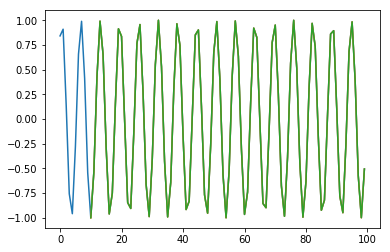

In [21]:
# plot baseline and predictions
plt.plot(data_1_sin[0:100])
plt.plot(trainPredictPlot_LSTM)
plt.plot(trainPredictPlot_GRU)
plt.show()

In [22]:
# shift test predictions for plotting
testPredictPlot_LSTM = numpy.empty_like(data_2_sin[0:100])
testPredictPlot_LSTM[:, :] = numpy.nan
testPredictPlot_LSTM[look_back:len(testPredict_LSTM)+look_back, :] = testPredict_LSTM[0:90]

In [23]:
# shift test predictions for plotting
testPredictPlot_GRU = numpy.empty_like(data_2_sin[0:100])
testPredictPlot_GRU[:, :] = numpy.nan
testPredictPlot_GRU[look_back:len(testPredict_GRU)+look_back, :] = testPredict_GRU[0:90]

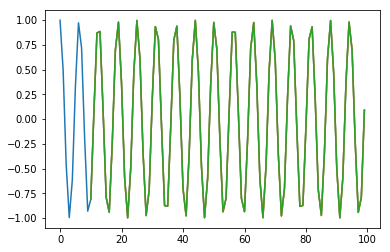

In [25]:
# plot test and predictions
plt.plot(data_2_sin[0:100])
plt.plot(testPredictPlot_LSTM)
plt.plot(testPredictPlot_GRU)
plt.show()

# Final conclusion
### GRU slightly better than GRU on both train & test